In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [428]:
automl = pd.read_csv("./submissions/blends/automl_lgbm_sub_1.csv")
catb = pd.read_csv("./submissions/blends/catboost_sub_1.csv")
xgb = pd.read_csv("./submissions/blends/xgb_sub_prob_1.csv")

temp1 = pd.read_csv("./submissions/blends/blend_input2.csv")
temp2 = pd.read_csv("./submissions/blends/extra_tree_sub1.csv")
temp3 = pd.read_csv("./submissions/blends/blend_input1.csv")

In [418]:
temp1.head()

,PERID,Criminal
0,66583679,0
1,35494679,0
2,79424679,0
3,11744679,0
4,31554679,0


In [419]:
b1 = catb.copy()
col = catb.columns

col = col.tolist()
col.remove('PERID')
col

['Criminal']

In [420]:
def plot_relation(x, y):
    plt.plot(x, y, 'ro')
    plt.show()

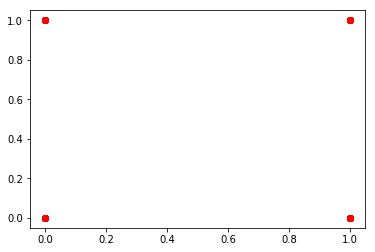

In [421]:
plot_relation(temp1['Criminal'], temp2['Criminal'])

In [470]:
for i in col:
    b1[i] = (temp1[i]*3 + temp2[i]*1 + temp3[i]*2)/6

In [471]:
b1.head()

,PERID,Criminal
0,66583679,0.0
1,35494679,0.0
2,79424679,0.0
3,11744679,0.0
4,31554679,0.0


In [472]:
b1.describe()

,PERID,Criminal
count,1.143000e+04,11430.000000
mean,5.456695e+07,0.055920
std,2.549971e+07,0.219648
min,1.000192e+07,0.000000
25%,3.254394e+07,0.000000
50%,5.443707e+07,0.000000
75%,7.645086e+07,0.000000
max,9.999490e+07,1.000000


In [469]:
b1['Criminal'] = [int(x) for x in b1['Criminal']]

In [477]:
b1['Criminal'] = [1 if x>=0.21 else 0 for x in b1['Criminal']]

In [478]:
b1.shape

(11430, 2)

In [479]:
b1.to_csv('submissions/blends/blend1-_automl_lgbm_sub_1-catboost_sub_1-xgb_sub_prob_1.csv', index = False)

In [480]:
b1['Criminal'][b1['Criminal']<0.18].sum()

0

In [481]:
b1.sum()

PERID       623700221802
Criminal             669
dtype: int64